In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [51]:
# use mysql.connector.connect instead of mysql.connect
db = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="kaustav007",
    port=3306,
    database="ecommerce"
)

cur = db.cursor()


## List all unique cities where customers are located.

In [52]:
query = """ SELECT DISTINCT customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [53]:
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## Count the number of orders placed in 2017

In [54]:
query = """ SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 45101)

In [55]:
data

[(45101,)]

# Find the total sales per category.

In [56]:
query = """
SELECT upper(products.`product category`) AS category, 
       SUM(payments.payment_value) AS sales 
FROM products 
JOIN order_items ON products.product_id = order_items.product_id 
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.`product category`
"""


cur.execute(query)

data = cur.fetchall()

In [57]:
data

[('PERFUMERY', 506738.6600000037),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.0500000097),
 ('BED TABLE BATH', 1712553.6700000048),
 ('AUTOMOTIVE', 852294.3300000005),
 ('COMPUTER ACCESSORIES', 1585330.450000003),
 ('HOUSEWARES', 1094758.1299999973),
 ('BABIES', 539845.6599999988),
 ('TOYS', 619037.6899999996),
 ('FURNITURE OFFICE', 646826.4900000006),
 ('COOL STUFF', 779697.9999999983),
 ('HEALTH BEAUTY', 1657373.1200000094),
 ('PET SHOP', 311268.9699999997),
 ('GENERAL INTEREST BOOKS', 64694.75999999999),
 ('STATIONARY STORE', 317440.07000000135),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55000000005),
 ('CLIMATIZATION', 91170.66000000003),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.6299999998),
 ('SPORT LEISURE', 1392127.5600000073),
 ('BAGS ACCESSORIES', 187151.28999999998),
 ('ELECTRONICS', 259857.10000000164),
 ('CASA CONSTRUCAO', 136645.29000000012),
 ('GAMES CONSOLES', 195480.38000000047),
 ('FASHION BAGS AND ACCESSORIES', 218158.27999999985),
 ('HOME

In [58]:
df = pd.DataFrame(data, columns= ['Category', 'Sales'])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


## Calculate the percentage of orders that were paid in installments.

In [59]:
query = """

SELECT (SUM(case when payment_installments >= 1 then 1
else 0 end))/COUNT(*)*100 from payments 

"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

## Count the number of customers from each state. 

In [60]:
query = """ 

SELECT customer_state, COUNT(customer_id)
FROM customers 
GROUP BY customer_state

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["state", "customer_count"])
df = df.sort_values(by= 'customer_count', ascending=False)



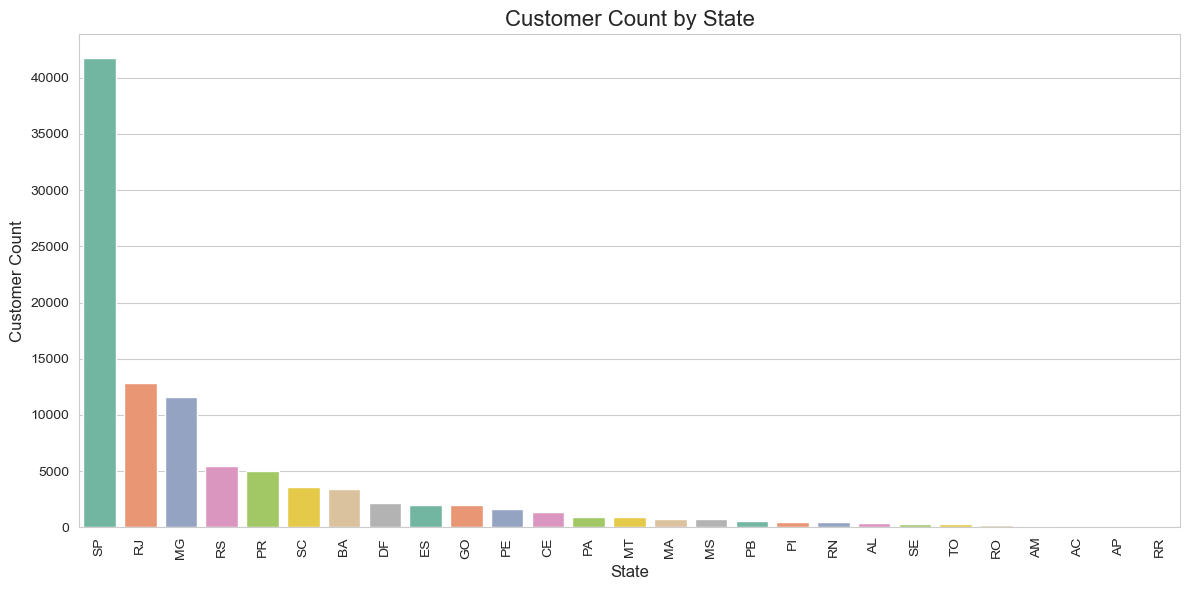

In [61]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='state',
    y='customer_count',
    hue='state',  
    data=df,
    palette='Set2',      # Try 'viridis', 'coolwarm', 'Set2', etc.
    dodge=False,
    legend=False
)

plt.xticks(rotation=90)
plt.title("Customer Count by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.tight_layout()
plt.show()


In [62]:
df

,state,customer_count
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


## Intermediate Queries

## Calculate the number of orders per month in 2018.

In [ ]:

query = """

SELECT MONTHNAME(order_purchase_timestamp) AS months, COUNT(order_id) AS order_counts
FROM orders WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY months

"""

cur.execute(query)

data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["months", "order_count"])

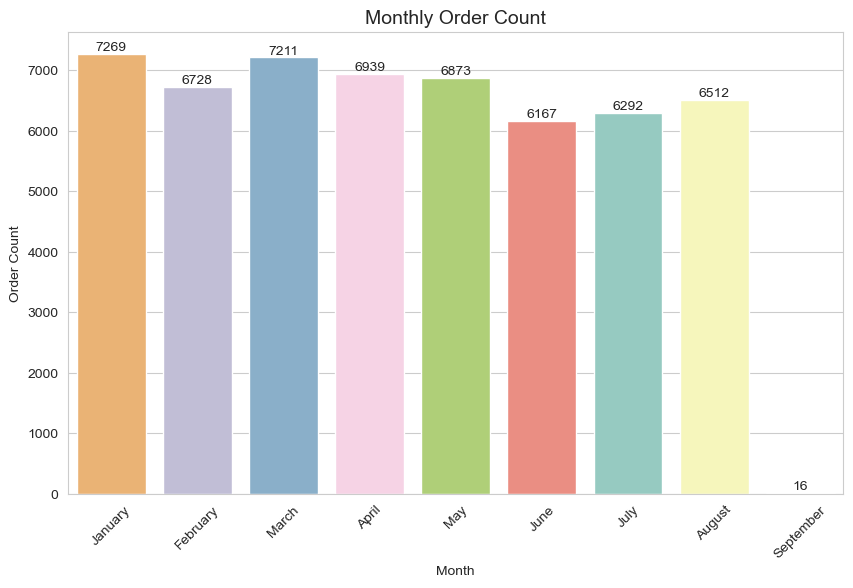

In [65]:
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='months',
    y='order_count',
    hue='months',  # Explicitly set hue
    data=df,
    order=o,
    palette='Set3',
    legend=False  # Hide the unnecessary legend
)

plt.xticks(rotation=45)
plt.title("Monthly Order Count", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Order Count")

# Label each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Find the average number of products per order, grouped by customer city.

In [ ]:
query = """ 

WITH count_per_order AS
(SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc
FROM orders JOIN order_items
ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id)

SELECT customers.customer_city, round(avg(count_per_order.oc),2) average_orders
FROM customers JOIN count_per_order
ON customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc;



"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["customer city", "average products/orders"])

df.head(10)

,customer city,average products/orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


## Calculate the percentage of total revenue contributed by each product category.

In [ ]:
query = """ 

SELECT upper(products.`product category`) AS category, 
       ROUND((SUM(payments.payment_value)/(select sum(payment_value) from payments))*100, 2) AS sales_percentage
FROM products 
JOIN order_items ON products.product_id = order_items.product_id 
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.`product category` order by sales_percentage desc;

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Category", "percentage distribution"])
df.head(10)



,Category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


## Identify the correlation between product price and the number of times a product has been purchased.

In [47]:
query = """

SELECT products.`product category`,
COUNT(order_items.product_id),
ROUND(avg(order_items.price),2)
FROM products JOIN order_items
ON products.product_id = order_items.product_id
GROUP BY products.`product category`

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Category", "order_count", "price"])

In [48]:
print(df.columns.tolist())

['Category', 'order_count', 'price']


In [ ]:
arr1 = df["order_count"]
arr2 = df["price"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

- No correlation showing

In [21]:
a = np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is", a[0][1])

the correlation between price and number of times a product has been purchased is -0.10631514167157562


In [22]:
df

,Category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


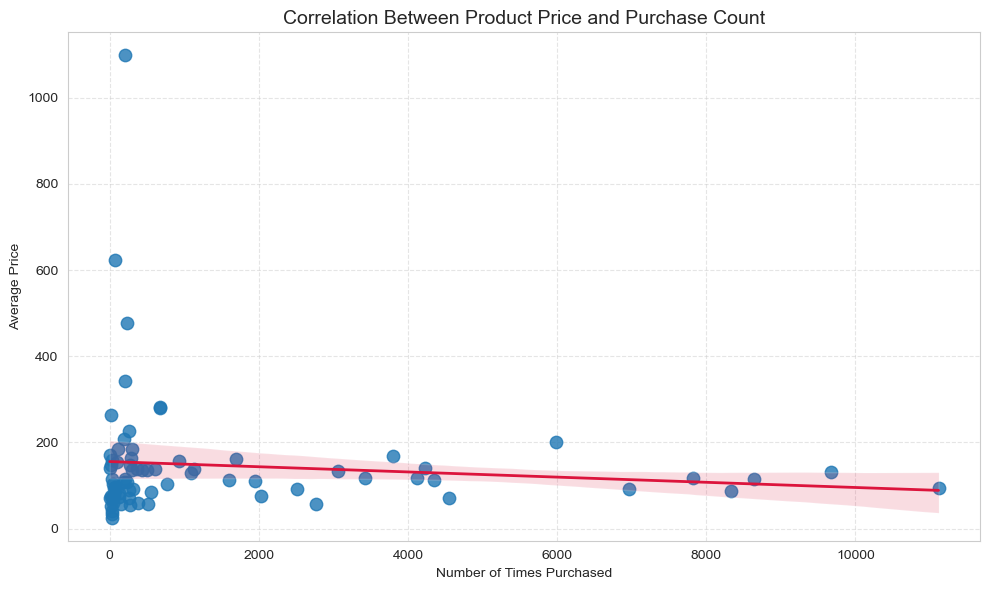

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='order_count',
    y='price',
    data=df,
    scatter_kws={'s': 80, 'color': '#1f77b4'},  # Customize size and color of points
    line_kws={"color": "crimson", "linewidth": 2}  # Customize regression line
)
plt.title("Correlation Between Product Price and Purchase Count", fontsize=14)
plt.xlabel("Number of Times Purchased")
plt.ylabel("Average Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Calculate the total revenue generated by each seller, and rank them by revenue.

In [23]:
query = """ 

SELECT *, DENSE_RANK() OVER(order by revenue desc) AS rn FROM
(SELECT order_items.seller_id, SUM(payments.payment_value) AS revenue
FROM order_items JOIN payments
ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id) AS a

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["seller_id", "revenue", "rank"])
df = df.head()

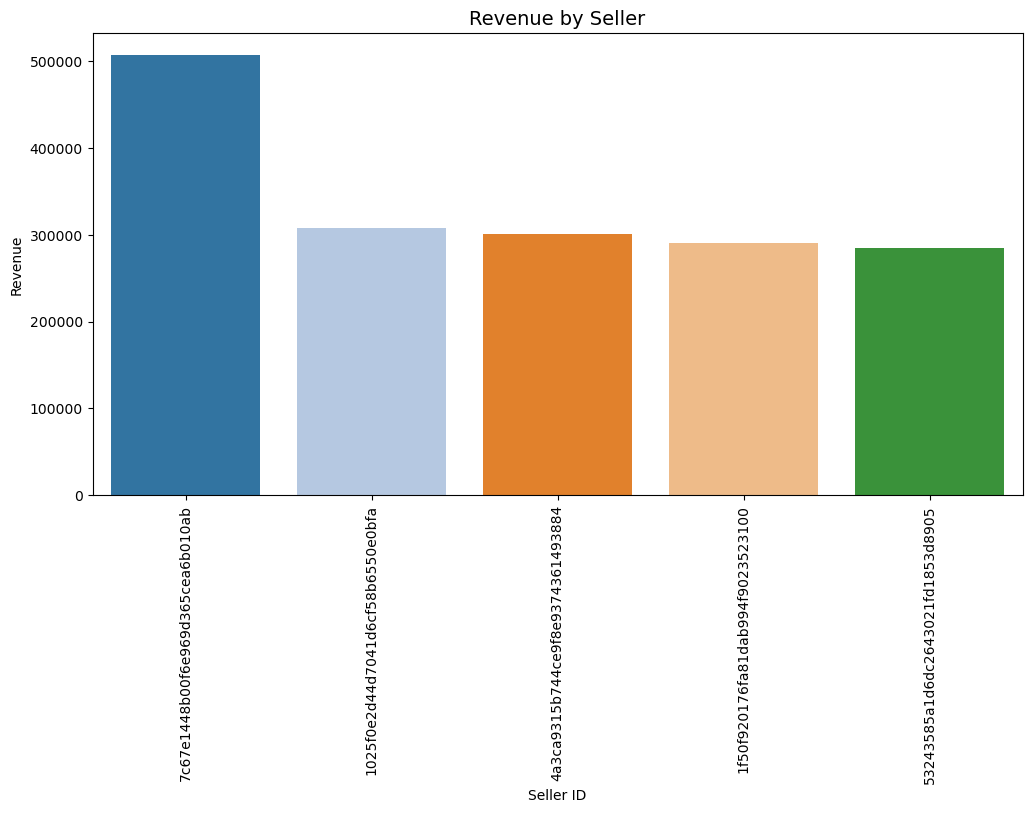

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='seller_id',
    y='revenue',
    hue='seller_id',  # Assigning hue to make the palette work
    data=df,
    palette='tab20',  # You can try 'Set3', 'Paired', 'tab10', 'tab20'
    legend=False       # Hide redundant legend
)

plt.xticks(rotation= 90)
plt.title("Revenue by Seller", fontsize=14)
plt.xlabel("Seller ID")
plt.ylabel("Revenue")

# # Optional: Label each bar
# for container in ax.containers:
#     ax.bar_label(container, fontsize=8, rotation=90)
# 
# plt.tight_layout()
plt.show()

## Calculate the moving average of order values for each customer over their order history.

In [ ]:
query = """ 

SELECT customer_id, order_purchase_timestamp, payment,
avg(payment) OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp
					ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg
FROM
(SELECT orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
FROM payments JOIN orders
ON payments.order_id = orders.order_id) AS a

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["custoner_id", "order_purchase_timestamp", "payment", "mov_avg"])
df

,custoner_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


## Calculate the cumulative sales per month for each year.

In [ ]:
query = """ 

SELECT years, months, payment, sum(payment) OVER(ORDER BY years, months) AS cumulative_sales
FROM
(SELECT YEAR(orders.order_purchase_timestamp) AS years,
MONTH(orders.order_purchase_timestamp) AS months,
ROUND(SUM(payments.payment_value),2) AS payment FROM orders JOIN payments
ON orders.order_id = payments.order_id
GROUP BY years, months ORDER BY years, months) as a

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['years','months','payment','cumulative_sales'])

df

,years,months,payment,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


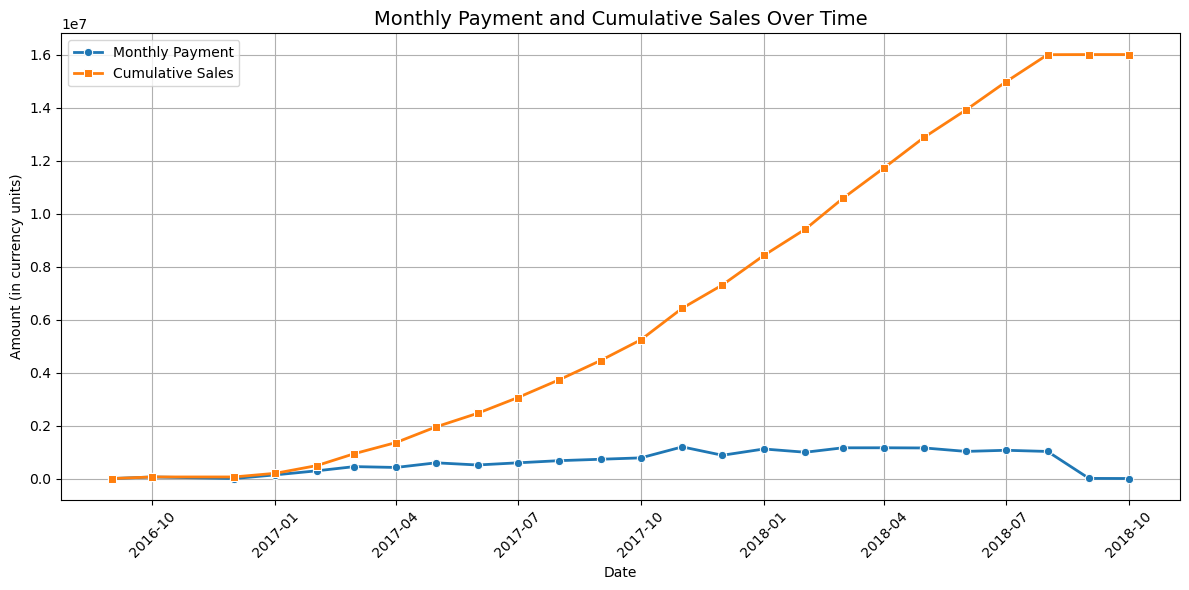

In [30]:
# Step 1: Create a datetime column
df['date'] = pd.to_datetime(df[['years', 'months']].assign(day=1))

# Step 2: Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='payment', data=df, label='Monthly Payment', marker='o', linewidth=2)
sns.lineplot(x='date', y='cumulative_sales', data=df, label='Cumulative Sales', marker='s', linewidth=2)

# Step 3: Style
plt.title("Monthly Payment and Cumulative Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Amount (in currency units)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculate the year-over-year growth rate of total sales.

In [33]:
query = """ 

WITH a AS(SELECT YEAR(orders.order_purchase_timestamp) AS years,
ROUND(SUM(payments.payment_value),2) AS payment FROM orders JOIN payments
ON orders.order_id = payments.order_id
GROUP BY years ORDER BY years)

SELECT years, payment, LAG(payment) OVER(ORDER BY years) AS previous_year, ((payment - lag(payment, 1) OVER(ORDER BY years))/
lag(payment, 1) OVER(ORDER BY years)) * 100  yoy_percentage_growth FROM a

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['years','sales', 'previous_year', 'yoy_percentage_growth'])

df

,years,sales,previous_year,yoy_percentage_growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [34]:
query = """  

WITH a AS (SELECT customers.customer_id,
MIN(orders.order_purchase_timestamp) AS first_order
FROM customers JOIN orders
ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_id),

b as (SELECT a.customer_id, COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
FROM a JOIN orders 
ON orders.customer_id = a.customer_id
AND orders.order_purchase_timestamp > first_order
AND orders.order_purchase_timestamp < DATE_ADD(first_order, interval 6 month)
GROUP BY a.customer_id)

SELECT 100 * (COUNT( DISTINCT a.customer_id)/COUNT(DISTINCT b.customer_id))
FROM a left join b
ON a.customer_id = b.customer_id;

"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

Since none of the customers are repeated thats why our value is None

## Identify the top 3 customers who spent the most money in each year.


In [35]:
query = """

SELECT years, customer_id, payment, d_rank 
FROM 
(SELECT YEAR(orders.order_purchase_timestamp) AS years,
orders.customer_id,
SUM(payments.payment_value) AS payment,
DENSE_RANK() OVER(PARTITION BY YEAR(orders.order_purchase_timestamp) 
					ORDER BY SUM(payments.payment_value) DESC) AS d_rank
FROM orders JOIN Payments
ON payments.order_id = orders.order_id
GROUP BY YEAR(orders.order_purchase_timestamp),
orders.customer_id) AS a
WHERE d_rank <=3 ;

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['years', 'id', 'payment', 'rank'])

In [36]:
df

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


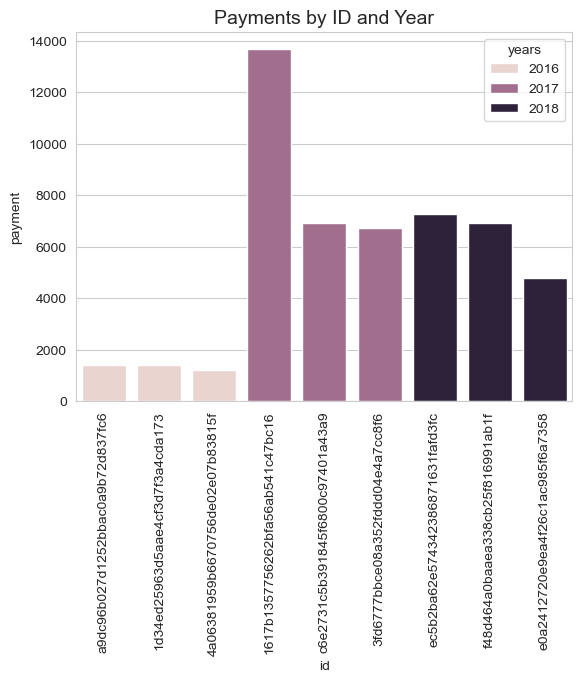

In [44]:
# Stylish color palette (Hue-Saturation-Lightness)

sns.set_style("whitegrid")  # Optional: cleaner background
sns.set_palette("husl")     # Stylish color palette (Hue-Saturation-Lightness)

sns.barplot(x="id", y="payment", data=df, hue="years")
plt.xticks(rotation=90)
plt.title("Payments by ID and Year", fontsize=14)

plt.show()